# <img src="radio.jpg" alt="radiografia" height="200" width="800"  align="left">
<br>
<h1>Clasificador de radiografias</h1>
<br>
<h2>Detector de neumonias</h2>

In [ ]:
# !pip install imblearn

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm #barra de progreso
import cv2
from glob import glob
#para redimensionar
import sklearn
import skimage
from skimage.transform import resize
import random
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from skimage.color import rgb2gray
import datetime
# para cargar imagenes desde url
from PIL import Image
import requests
from io import BytesIO

print(tf.__version__)

2.0.0-alpha0


In [3]:
train_dir = "chest_xray/train/"
test_dir = "chest_xray/test/"

LOAD_FROM_IMAGES = True

def get_data(folder):
    x = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['NORMAL']:
                label = 0
            elif folderName in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (150, 120, 3), mode='constant', anti_aliasing=True)
                    img_file = rgb2gray(img_file)
                    img_arr = np.array(img_file)
                    x.append(img_arr)
                    y.append(label)
                    
    x = np.asarray(x)
    y = np.asarray(y)
    return x, y

if LOAD_FROM_IMAGES:
    #cargar imagenes a los arrays
    x_train, y_train = get_data(train_dir)
    x_test, y_test = get_data(test_dir)
    
    #grabar array en archivos
    np.save('xtrain.npy', x_train)
    np.save('ytrain.npy', y_train)
    np.save('xtest.npy', x_test)
    np.save('ytest.npy', y_test)
else:
    #cargar imagenes ya cargadas
    x_train = np.load('xtrain.npy')
    y_train = np.load('ytrain.npy')
    x_test = np.load('xtest.npy')
    y_test = np.load('ytest.npy')

100%|██████████| 390/390 [01:05<00:00,  3.40it/s]


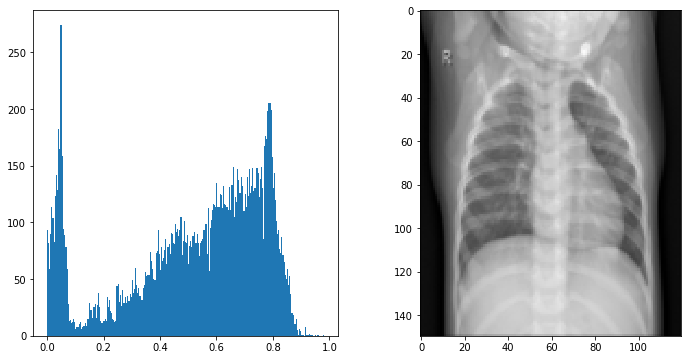

In [4]:
def plotHistogram(a):
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    plt.hist(a.ravel(), bins=255)
    plt.subplot(1, 2, 2)
    plt.imshow(a, cmap='gray', vmin=0, vmax=1)
    plt.show()
plotHistogram(x_train[3])

<h2>Radiografias de pacientes normales (sin neumonia)</h2>

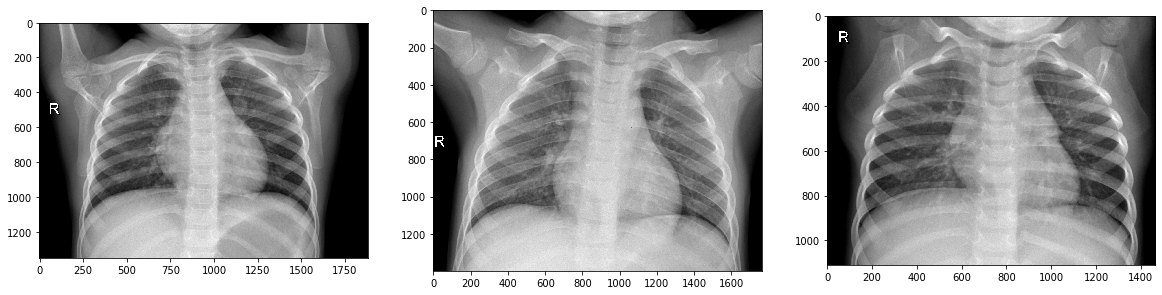

In [5]:
multipleImages = glob('chest_xray/train/NORMAL/**')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2]));
plotThreeImages(multipleImages)
    

No neumonia


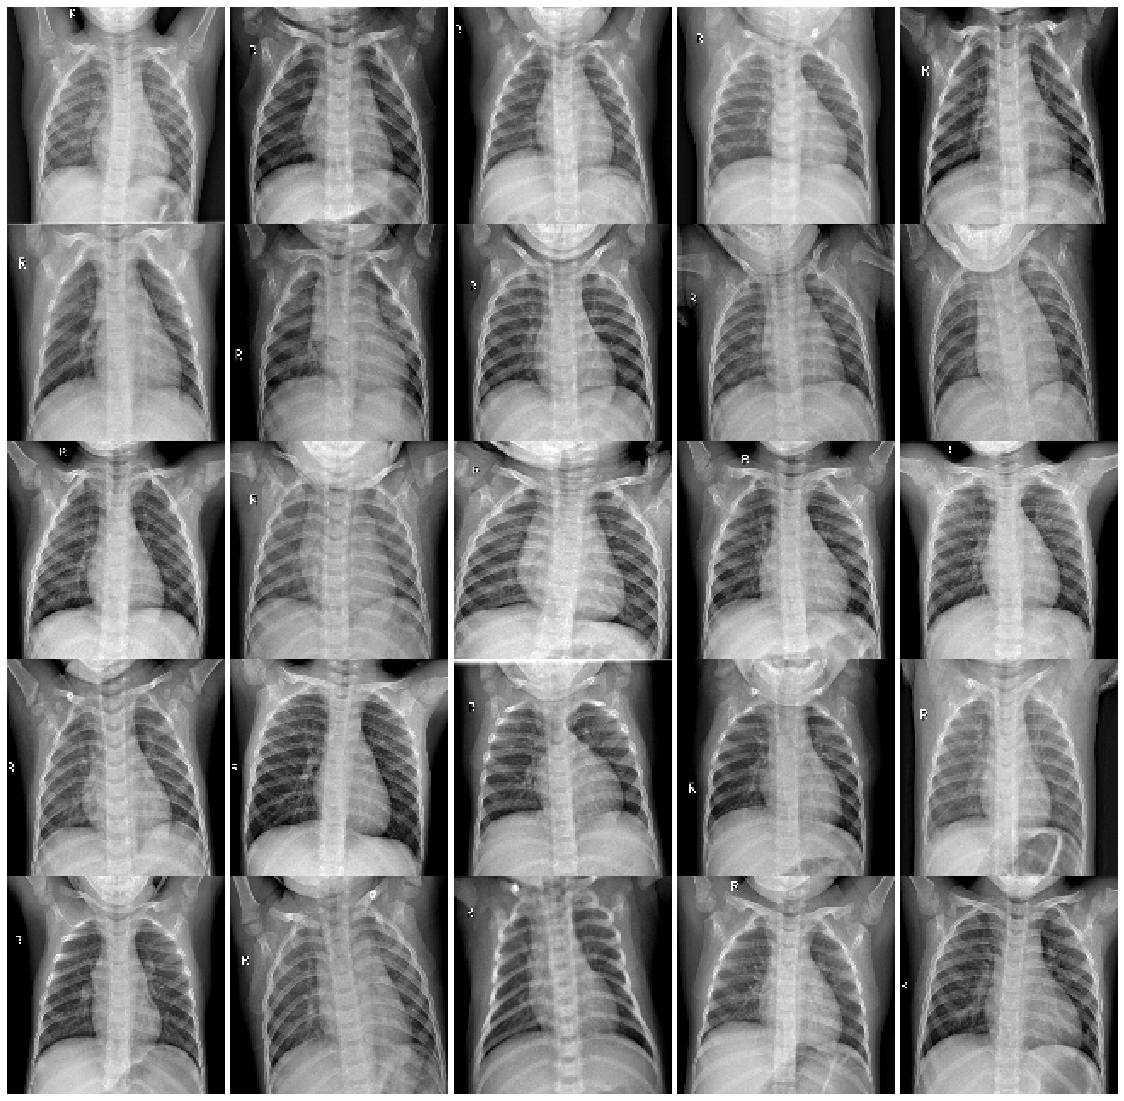

In [6]:
print("No neumonia")
multipleImages = glob('chest_xray/train/NORMAL/**')
i_ = 0
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.subplots_adjust(wspace=0, hspace=0)
for i in multipleImages[:25]:
    im = cv2.imread(i)
    im = cv2.resize(im, (128,128))
    plt.subplot(5,5,i_+1)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ +=1

<h2>Radiografias de pacientes con neumonia</h2>

Si neumonia


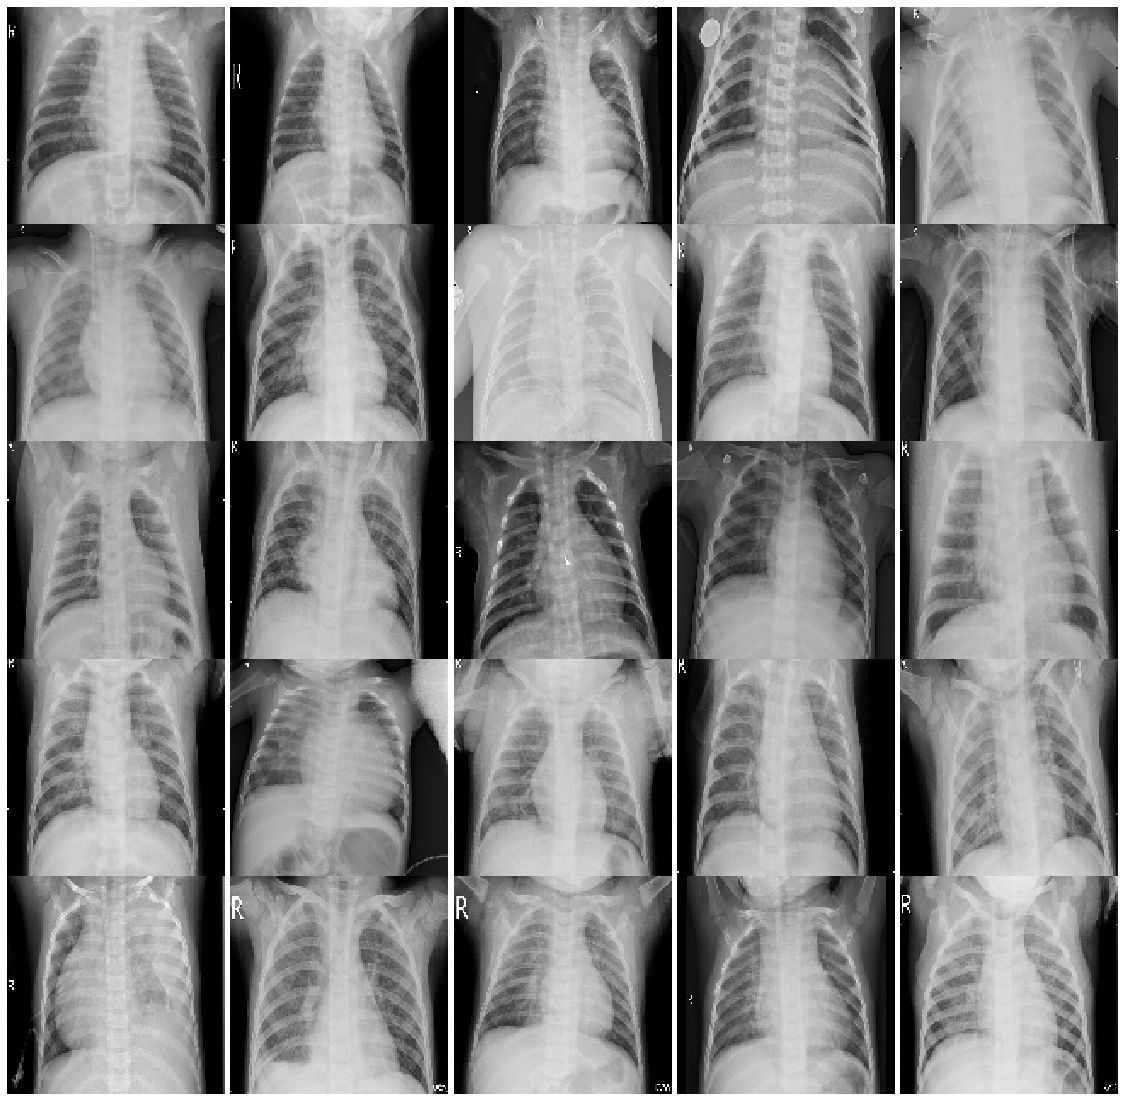

In [7]:
print("Si neumonia")
multipleImages = glob('chest_xray/train/PNEUMONIA/**')
i_ = 0
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.subplots_adjust(wspace=0, hspace=0)
for i in multipleImages[:25]:
    im = cv2.imread(i)
    im = cv2.resize(im, (128,128))
    plt.subplot(5,5,i_+1)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ +=1

{0: 'No neumonia', 1: 'Si neumonia'}


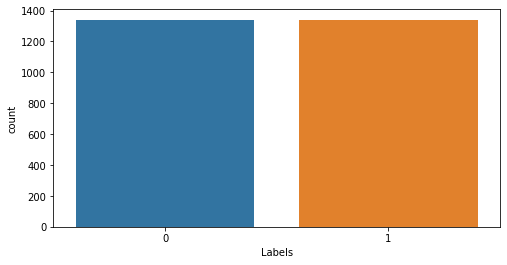

In [8]:
import seaborn as sns

plt.figure(figsize=(8,4))
map_characters = {0: 'No neumonia', 1: 'Si neumonia'}
dict_characters = map_characters

df = pd.DataFrame()
df["Labels"] = y_train
lab = df["Labels"]
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

In [13]:
x_trainReshaped = x_train.reshape(len(x_train), 150, 120, 1)
x_testReshaped = x_test.reshape(len(x_test), 150, 120, 1)

In [14]:
x_trainReshaped.shape

(2682, 150, 120, 1)

In [15]:
x_trainReshaped[0]

array([[[0.05762092],
        [0.0580719 ],
        [0.06562745],
        ...,
        [0.31675817],
        [0.31403922],
        [0.26918083]],

       [[0.06748366],
        [0.07058824],
        [0.07058824],
        ...,
        [0.36470588],
        [0.36078431],
        [0.31118954]],

       [[0.0671024 ],
        [0.07058824],
        [0.06666667],
        ...,
        [0.36470588],
        [0.35686275],
        [0.30359477]],

       ...,

       [[0.09411765],
        [0.10588235],
        [0.10588235],
        ...,
        [0.15111111],
        [0.15503268],
        [0.13275599]],

       [[0.09885621],
        [0.11341176],
        [0.10980392],
        ...,
        [0.25035294],
        [0.25396078],
        [0.21669281]],

       [[0.11669499],
        [0.13333333],
        [0.13213072],
        ...,
        [0.32308497],
        [0.32580392],
        [0.2815817 ]]])

In [17]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation = 'relu', input_shape=(150, 120, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,  2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,  2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(2, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 118, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 59, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 57, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 28, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 11, 64)       

In [18]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

checkpoint_path = "checkpoints/check";
log_dir = os.path.join("logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
cp_callbacks = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

model.fit(x_trainReshaped,
          y_train,
          epochs = 6,
          validation_data = (x_testReshaped, y_test),
          callbacks = [tensorboard_callbacks])

Train on 2682 samples, validate on 624 samples
Epoch 1/6
2682/2682 [==============================] - ETA: 2:24 - loss: 0.6953 - accuracy: 0.43 - ETA: 2:02 - loss: 0.8184 - accuracy: 0.35 - ETA: 1:47 - loss: 0.7755 - accuracy: 0.41 - ETA: 1:39 - loss: 0.7647 - accuracy: 0.38 - ETA: 1:33 - loss: 0.7488 - accuracy: 0.42 - ETA: 1:29 - loss: 0.7408 - accuracy: 0.41 - ETA: 1:26 - loss: 0.7338 - accuracy: 0.47 - ETA: 1:24 - loss: 0.7288 - accuracy: 0.47 - ETA: 1:22 - loss: 0.7237 - accuracy: 0.49 - ETA: 1:20 - loss: 0.7218 - accuracy: 0.48 - ETA: 1:19 - loss: 0.7186 - accuracy: 0.49 - ETA: 1:19 - loss: 0.7159 - accuracy: 0.49 - ETA: 1:20 - loss: 0.7138 - accuracy: 0.49 - ETA: 1:20 - loss: 0.7114 - accuracy: 0.50 - ETA: 1:19 - loss: 0.7105 - accuracy: 0.49 - ETA: 1:17 - loss: 0.7085 - accuracy: 0.50 - ETA: 1:16 - loss: 0.7067 - accuracy: 0.50 - ETA: 1:14 - loss: 0.7054 - accuracy: 0.49 - ETA: 1:12 - loss: 0.7034 - accuracy: 0.52 - ETA: 1:11 - loss: 0.7017 - accuracy: 0.53 - ETA: 1:09 - loss: 

2682/2682 [==============================] - ETA: 1:58 - loss: 0.1700 - accuracy: 0.93 - ETA: 1:53 - loss: 0.1552 - accuracy: 0.90 - ETA: 1:50 - loss: 0.2415 - accuracy: 0.89 - ETA: 1:48 - loss: 0.1966 - accuracy: 0.91 - ETA: 1:46 - loss: 0.1794 - accuracy: 0.91 - ETA: 1:45 - loss: 0.1625 - accuracy: 0.92 - ETA: 1:42 - loss: 0.1746 - accuracy: 0.91 - ETA: 1:38 - loss: 0.1624 - accuracy: 0.92 - ETA: 1:36 - loss: 0.1858 - accuracy: 0.92 - ETA: 1:33 - loss: 0.1779 - accuracy: 0.92 - ETA: 1:31 - loss: 0.1811 - accuracy: 0.92 - ETA: 1:30 - loss: 0.1876 - accuracy: 0.92 - ETA: 1:28 - loss: 0.1815 - accuracy: 0.93 - ETA: 1:26 - loss: 0.1768 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1809 - accuracy: 0.92 - ETA: 1:21 - loss: 0.1727 - accuracy: 0.92 - ETA: 1:20 - loss: 0.1711 - accuracy: 0.93 - ETA: 1:18 - loss: 0.1660 - accuracy: 0.93 - ETA: 1:17 - loss: 0.1735 - accuracy: 0.93 - ETA: 1:16 - loss: 0.1666 - accuracy: 0.93 - ETA: 1:15 - loss: 0.1677 - accuracy: 0.93 - ETA: 1:13 - loss: 0.1634 - accu

2682/2682 [==============================] - ETA: 1:31 - loss: 0.1653 - accuracy: 0.93 - ETA: 1:29 - loss: 0.1586 - accuracy: 0.93 - ETA: 1:30 - loss: 0.1202 - accuracy: 0.95 - ETA: 1:29 - loss: 0.1886 - accuracy: 0.93 - ETA: 1:26 - loss: 0.1599 - accuracy: 0.94 - ETA: 1:26 - loss: 0.1560 - accuracy: 0.94 - ETA: 1:24 - loss: 0.1484 - accuracy: 0.94 - ETA: 1:22 - loss: 0.1375 - accuracy: 0.94 - ETA: 1:20 - loss: 0.1423 - accuracy: 0.94 - ETA: 1:19 - loss: 0.1348 - accuracy: 0.95 - ETA: 1:18 - loss: 0.1302 - accuracy: 0.95 - ETA: 1:18 - loss: 0.1264 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1213 - accuracy: 0.95 - ETA: 1:14 - loss: 0.1171 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1135 - accuracy: 0.96 - ETA: 1:11 - loss: 0.1093 - accuracy: 0.96 - ETA: 1:10 - loss: 0.1100 - accuracy: 0.96 - ETA: 1:08 - loss: 0.1091 - accuracy: 0.96 - ETA: 1:07 - loss: 0.1079 - accuracy: 0.96 - ETA: 1:06 - loss: 0.1047 - accuracy: 0.96 - ETA: 1:05 - loss: 0.1023 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1019 - accu

In [23]:
#test_loss, test_acc = model.evaluate(x_testReshaped, y_test)
print("precision -> ", test_acc)

precision ->  0.875


In [25]:
#test_loss, test_acc = model.evaluate(x_trainReshaped, y_train)
print("Precision -> ", test_acc)

Precision ->  0.96644294


In [240]:
predictions = model.predict(x_testReshaped)

In [241]:
predictions[1]

array([0.43020904, 0.569791  ], dtype=float32)

In [242]:
np.argmax(predictions[1])

1

In [295]:
plt.style.use("seaborn-dark")

In [296]:
class_names = ['NORMAL', 'NEUMONIA']

In [297]:
y_train.shape

(2682,)

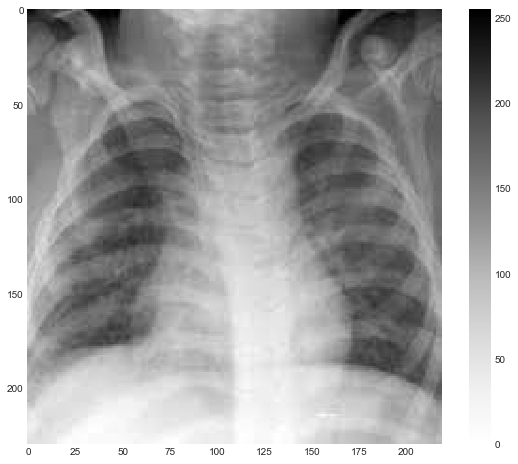

In [331]:
response = requests.get("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR4Pyf3H65lYMcufwsDonYlJKVlZPfzTtDvg09KwHp5SIF_aPKPqQ")
img = Image.open(BytesIO(response.content))
np_img = np.array(img)

plt.figure(figsize=(10,8))
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

In [332]:
np_img.shape

(230, 219, 3)

In [333]:
bw_image = np_img

In [334]:
bw_image = skimage.transform.resize(bw_image, (150, 120, 3), mode='constant', anti_aliasing=True)
bw_image = rgb2gray(bw_image)

In [335]:
bw_image.shape

(150, 120)

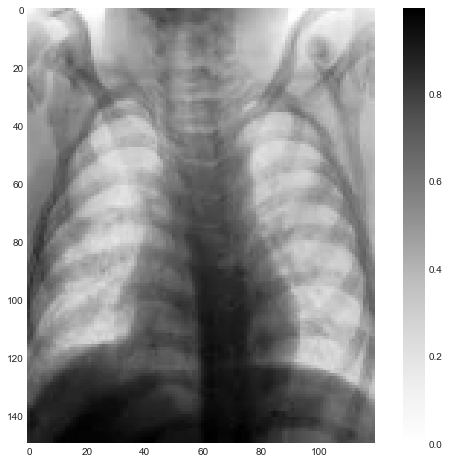

In [336]:
plt.figure(figsize=(10,8))
plt.imshow(bw_image)
plt.colorbar()
plt.grid(False)
plt.show()


In [337]:
x = np.zeros((1, 150, 120))
x.shape

(1, 150, 120)

In [338]:
x[0] = np.array(bw_image)

In [339]:
x.shape

(1, 150, 120)

In [340]:
xReshaped = x.reshape(len(x), 150, 120, 1)

In [341]:
xReshaped.shape

(1, 150, 120, 1)

In [342]:
predictions = model.predict(xReshaped)
predictions

array([[0.16604067, 0.8339593 ]], dtype=float32)

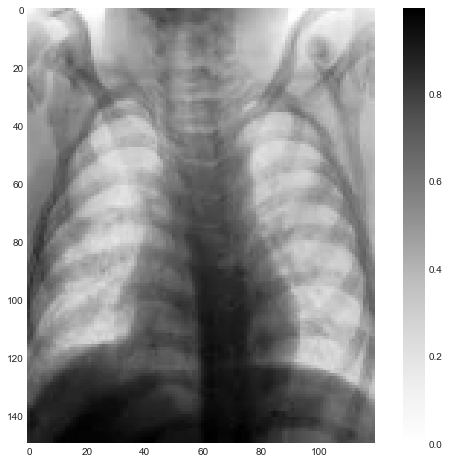

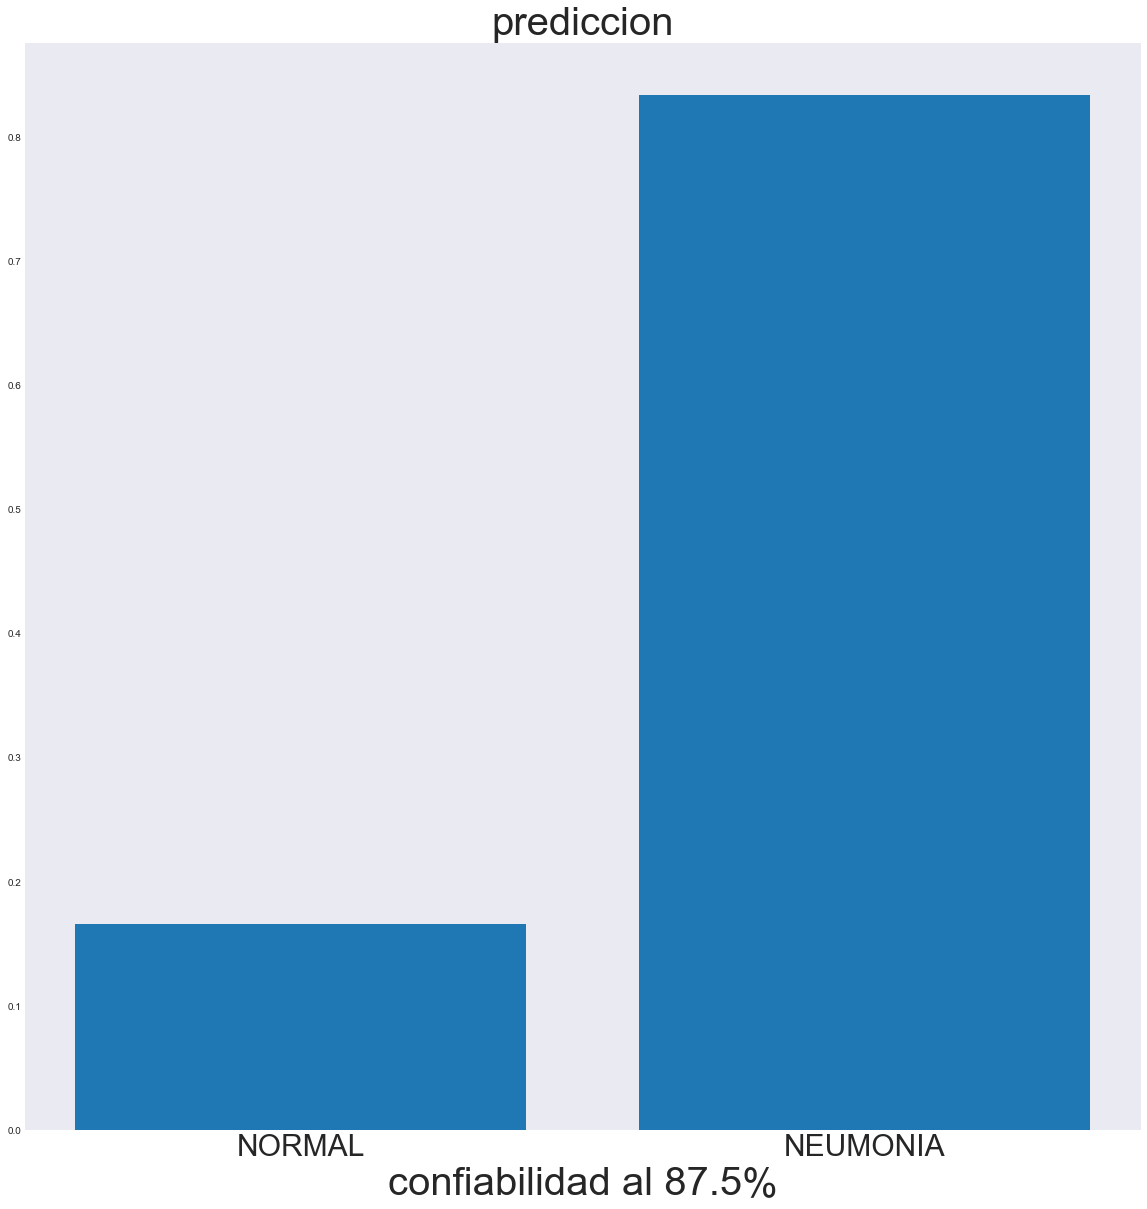

In [350]:
plt.figure(figsize=(10,8))
plt.imshow(bw_image)
plt.colorbar()
plt.grid(False)
plt.show()

index = np.arange(len(class_names))
plt.bar(index, predictions[0], align='center')
plt.xlabel('confiabilidad al 87.5%', fontsize=40)
plt.xticks(index, class_names, fontsize=30, rotation=0)
plt.title('prediccion', fontsize=40)
plt.show()